In [6]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
config = {}
# Training hyper parameters
config['batch_size'] = 128
config['epochs'] = 15
config['image_dimension'] = 128 #(height and width to which all images will be resized)
# Techniques
config['random_initialization'] = False
config['class_weights'] = False
config['hierarchical'] = False
config['loss_function'] = 'sample_weight' # focal_loss, binary_crossentropy, or sample_weight
config['number_trainable_layers'] = 'all' #(number of trainable layers of the basemodel. either 'all' or an integer)
# Folders
config['data_folder'] = 'data/split_data_230412' #(path to folder where the train_df.json.bz2 and val_df.json.bz2 are in)
config['results_folder'] = 'results_paper/230412_flatModel_sampleWeights' #(path to folder where training numbers will be saved)


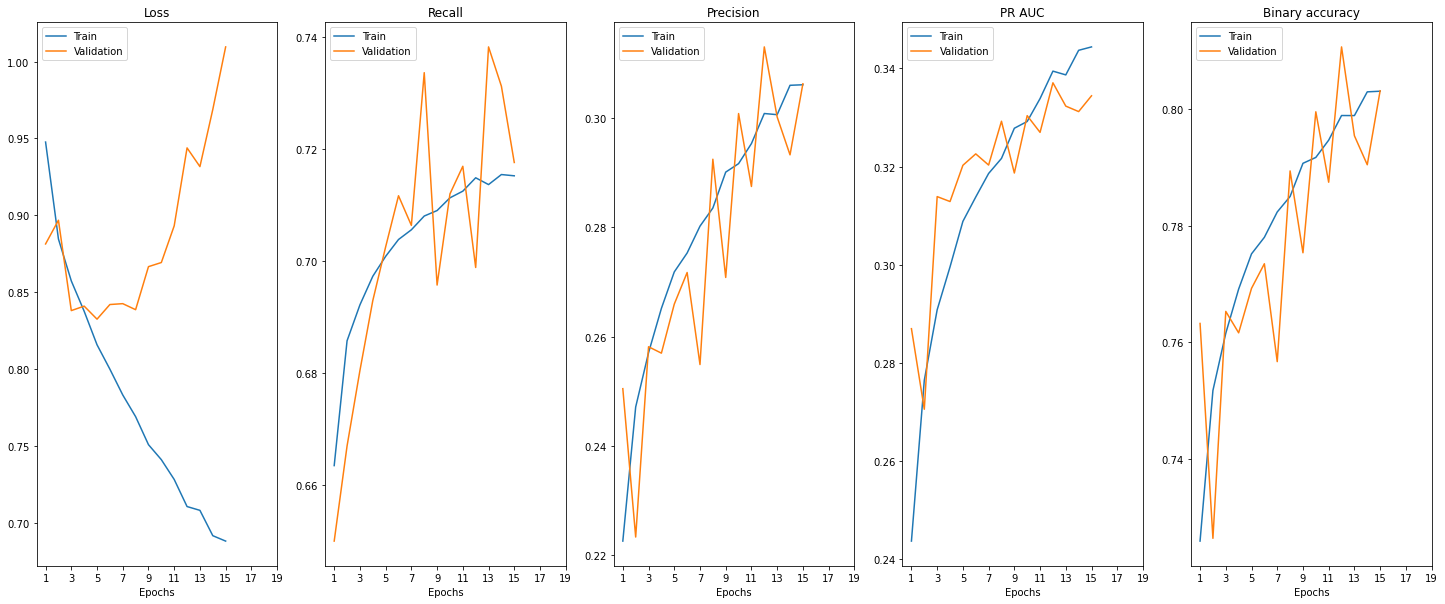

In [11]:
training_metrics = pd.read_csv(config['results_folder'] + '/history.csv')

epochs = training_metrics.shape[0]

plt.figure(figsize=(25,10))

_ = plt.subplot(1, 5, 1)
plt.plot(range(config['epochs']), training_metrics.loss.values, label='Training loss')
plt.plot(range(config['epochs']), training_metrics.val_loss.values, label='Validation loss')
plt.xlabel('Epochs')
plt.title('Loss')
plt.xticks(np.arange(0, 20, step=2), np.arange(1, 20, step=2))
plt.legend(['Train', 'Validation'])

_ = plt.subplot(1, 5, 2)
plt.plot(range(config['epochs']), training_metrics.recall.values, label='Training recall')
plt.plot(range(config['epochs']), training_metrics.val_recall.values, label='Validation recall')
plt.title('Recall')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 20, step=2), np.arange(1, 20, step=2))
plt.legend(['Train', 'Validation'])

_ = plt.subplot(1, 5, 3)
plt.plot(range(config['epochs']), training_metrics.precision.values, label='Training precision')
plt.plot(range(config['epochs']), training_metrics.val_precision.values, label='Validation precision')
plt.title('Precision')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 20, step=2), np.arange(1, 20, step=2))
plt.legend(['Train', 'Validation'])

_ = plt.subplot(1, 5, 4)
plt.plot(range(config['epochs']), training_metrics.pr_auc.values, label='Training PR_AUC')
plt.plot(range(config['epochs']), training_metrics.val_pr_auc.values, label='Validation PR_AUC')
plt.title('PR AUC')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 20, step=2), np.arange(1, 20, step=2))
plt.legend(['Train', 'Validation'])

_ = plt.subplot(1, 5, 5)
plt.plot(range(config['epochs']), training_metrics.binary_accuracy.values, label='Training binary acc')
plt.plot(range(config['epochs']), training_metrics.val_binary_accuracy.values, label='Validation binary acc')
plt.title('Binary accuracy')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 20, step=2), np.arange(1, 20, step=2))
plt.legend(['Train', 'Validation'])

# hf.save_img(config['results_folder'] + '/training_metrics.png')

In [12]:
import datetime

now = datetime.datetime.now()
YEAR = str(now.year)[-2:]
MONTH = str(now.month).zfill(2)
DAY = str(now.day).zfill(2)

filename = f'{DAY}{MONTH}{YEAR}-restoffilename'
print(filename)

140423-restoffilename
